In [1]:
import numpy as np 
from cvxpy import * 
import scipy as scipy
import matplotlib.pylab as plt

In [2]:
S = scipy.linalg.toeplitz([1, 0, 0, 0], [1, -1, 0, 0, -1, 0])
S[:,3] = [0, 0, -1, 0]
S[:,4] = [-1, 0, 0, 1]
S[:,5] = [0, 0, 1, -1]
S

array([[ 1, -1,  0,  0, -1,  0],
       [ 0,  1, -1,  0,  0,  0],
       [ 0,  0,  1, -1,  0,  1],
       [ 0,  0,  0,  0,  1, -1]])

In [3]:
S.dot([2, 1, 1, 2, 1, 1])

array([0, 0, 0, 0])

In [4]:
S.dot([1, 1, 1, 1, 0, 0])
S.dot([0, -1, -1, 0, 1, 1])

array([0, 0, 0, 0])

In [5]:
S2 = np.append(S, np.matrix([-1, 0, 1, 0]).T, 1)
S2      

matrix([[ 1, -1,  0,  0, -1,  0, -1],
        [ 0,  1, -1,  0,  0,  0,  0],
        [ 0,  0,  1, -1,  0,  1,  1],
        [ 0,  0,  0,  0,  1, -1,  0]])

# Computing null(S)

In [14]:
# Palsson pg.186 
U, D, V = scipy.linalg.svd(S)

V.shape

(6, 6)

# Optimization Problem

http://cvxopt.org/examples/tutorial/lp.html

http://nbviewer.jupyter.org/github/cvxgrp/cvxpy/blob/master/examples/notebooks/WWW/sparse_solution.ipynb

In [4]:
# Construct the problem.
n = 6
f = Variable(n)

# constraint on the fluxes.
constraints = [0 <= f, f <= 1, S*f == 0]

In [5]:
# objective flux defined by the wieghts in c. 
c = np.matrix([1.0, 1.0, 1.0, 1.0, 1.0, 1.0]) 
objective = Maximize(c*f)

In [6]:
prob = Problem(objective, constraints)
prob.solve()
print( "status:", prob.status)

status: optimal


In [7]:
# The steady state solution divides the flux into two halves. 
print('optim val: \n', prob.value, '\n optim. flux:\n', f.value)

optim val: 
 3.99999999979778 
 optim. flux:
 [[ 1. ]
 [ 0.5]
 [ 0.5]
 [ 1. ]
 [ 0.5]
 [ 0.5]]


In [10]:
f.value.item(0)
np.array(f.value)

array([[ 1. ],
       [ 0.5],
       [ 0.5],
       [ 1. ],
       [ 0.5],
       [ 0.5]])

# Drawing a network

In [83]:
import networkx as nx

In [84]:
# Encontrar una buena forma de notar la red para que coincida con los resultados de la optim.
fv = [v.item() for v in f.value]
temp = fv[3]
fv[3] = fv[4]
fv[4] = temp
fv

[0.9999999999494443,
 0.5000000002328995,
 0.5000000002328995,
 0.49999999971654624,
 0.9999999999494443,
 0.49999999971654624]

In [85]:
i = 0
for (u,v,d) in DNet.edges(data=True):
    DNet[u][v]['weight'] = fv[i] 
    i = i + 1

[(u, v, d) for (u,v,d) in DNet.edges(data=True)]

[(0, 1, {'weight': 0.9999999999494443}),
 (1, 2, {'weight': 0.5000000002328995}),
 (1, 4, {'weight': 0.5000000002328995}),
 (2, 3, {'weight': 0.49999999971654624}),
 (3, 5, {'weight': 0.9999999999494443}),
 (4, 3, {'weight': 0.49999999971654624})]

In [86]:
weights = [5*DNet[u][v]['weight'] for (u,v,d) in DNet.edges(data=True)]
weights

[4.999999999747222,
 2.5000000011644974,
 2.5000000011644974,
 2.499999998582731,
 4.999999999747222,
 2.499999998582731]

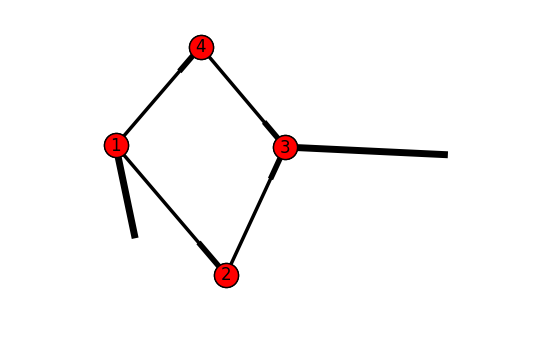

In [87]:
# https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx
edgelist=[(0,1), (1,2), (2,3), (1,4), (4,3), (3,5)]
DNet = nx.DiGraph(edgelist)

#nx.draw(DNet, with_labels=True)
pos = nx.spring_layout(DNet)
H = DNet.subgraph([1,2,3,4])
nodes = nx.draw_networkx_nodes(H, pos=pos)
edges = nx.draw_networkx_edges(DNet, pos=pos, width=weights, arrows=False) # without arrows seems better
nx.draw(H, pos=pos, with_labels=True)

plt.show()

# Sampling a parallelepiped